In [2]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import dython as dy # for nominal categorical data
from dython.nominal import associations 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os 
import taxi_survey 
from imp import reload
reload(taxi_survey)
from taxi_survey import *
from mord import LogisticIT
from mord import OrdinalRidge
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel


/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_22159/1538060926.py:16: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Read data

TODO: SYnc to GitHub

In [3]:
df_raw = pd.read_excel("Electric Taxis in South Africa(1-5000).xlsx")
df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))
df = df_raw.copy()
df.drop(df.columns[0:7], axis = 1, inplace = True)
df


/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_22159/1455652280.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))


,In which province or country do you live?,Do you live in a city/urban or rural environment?,In which area are you living in now?,What is your home language,How old are you?,What is your gender?,What is the highest level of schooling have you succesfully completed or passed?,Have you completed ANY tertiary education?,What education have you received after school?,What is the highest level of tertiary education you have succesfully completed?,...,How concernd are you about climate change?,The taxi industry should reduce its environmental impact,Petrol and diesel taxis are an environmental problem,Electric taxis will help lessen the harmful environmental impact caused by the taxi industry,Government should focus on switching to electric vehicles,You describe yourself as someone who often takes risks,You describe yourself as someone who has a lot of trust in other people and institutions in general,You describe yourself as someone who generally trusts new technologies,"This survey is not available in your region yet. If you wish to be contacted when it is, please leave your email address below. Otherwise, you can close this survey.","Thank you for completing the survey. Please share this survey with other minibus taxi owners, drivers, and users: https://bit.ly/etaxisurvey"
0,Western Cape,City / Urban,Nyanga,Xhosa,45 - 54,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,10.0,Agree,Neutral,Neutral,Neutral,Agree,Agree,Agree,NaN,NaN
1,Western Cape,City / Urban,Mitchell's Plain,Zulu,35 - 44,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,9.0,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,NaN,NaN
2,Western Cape,City / Urban,Cape Town,English,35 - 44,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,1.0,Strongly agree,Strongly disagree,Neutral,Neutral,Neutral,Neutral,Neutral,NaN,NaN
3,Western Cape,City / Urban,Eerste River,English,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,5.0,Neutral,Agree,Agree,Agree,Agree,Neutral,Agree,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Western Cape,City / Urban,Mfuleni,Xhosa,45 - 54,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,NaN,NaN
699,Western Cape,City / Urban,Khayelitsha,English,25 - 34,Male,Grade 10 (Std. 8 / Form 3),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Neutral,Agree,Disagree,Neutral,NaN,NaN
700,Western Cape,City / Urban,Mfuleni,Xhosa,35 - 44,Male,Grade 10 (Std. 8 / Form 3),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Strongly disagree,Disagree,Disagree,Disagree,NaN,NaN
701,Western Cape,City / Urban,Belhar,Afrikaans,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Strongly disagree,Agree,Agree,Neutral,NaN,NaN


###  <font color = 'lightgreen'> RunFirst - Initialize all question variables <\font>

In [4]:
driver_owner_user = df['Please select the option that applies to you:']
demographics = df.columns[0:6]
education = df.columns[6:10]
driver_owner_user = df['Please select the option that applies to you:'] # Question 10 
driver_questions=  df.columns[11:22]
owner_questions = df.columns[22:35]
owner_driver_questions = df.columns[35:47]
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver_e_taxi_better_than_ICE = df[driver_questions[10]]
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
owner_driver_e_taxi_benefit = user_questions[7]
owner_driver_e_taxi_risks = user_questions[8]
owner_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

## <font color = 'orange'>Table of contents <font>

In [3]:
demographics = df.columns[0:6]
education = df.columns[6:10]
driver_owner_user = df['Please select the option that applies to you:'] # Question 10 
driver_questions=  df.columns[11:22]
owner_questions = df.columns[22:35]
owner_driver_questions = df.columns[35:47]

# Demographics

In [26]:
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]


### Age vs length of taxi  vs appetite for take up of electric taxi  (by driver, owner, user)

Age vs length owned or driven taxi - conclusion: sample size for owner and owner driver small, so small trends there. Very clear trend for drivers (older = driving for longer)

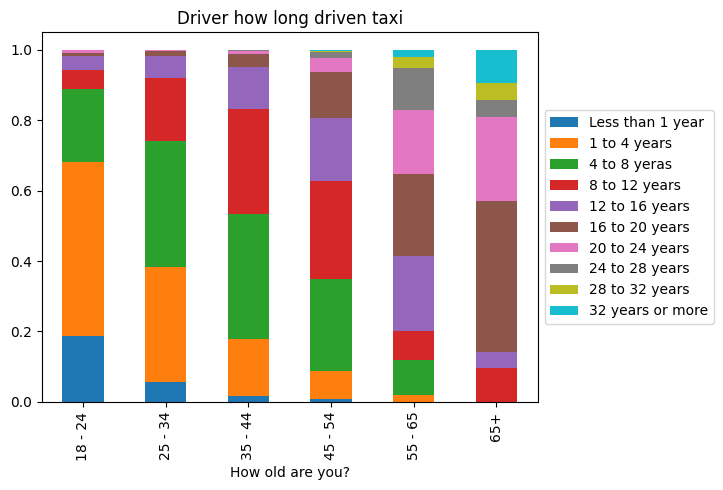

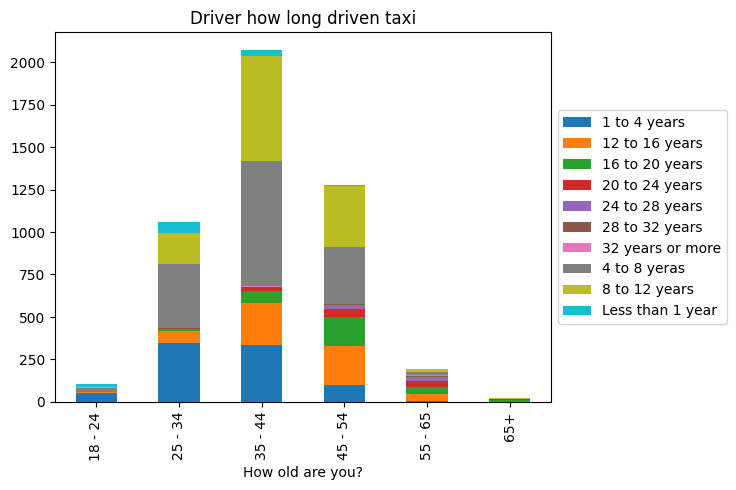

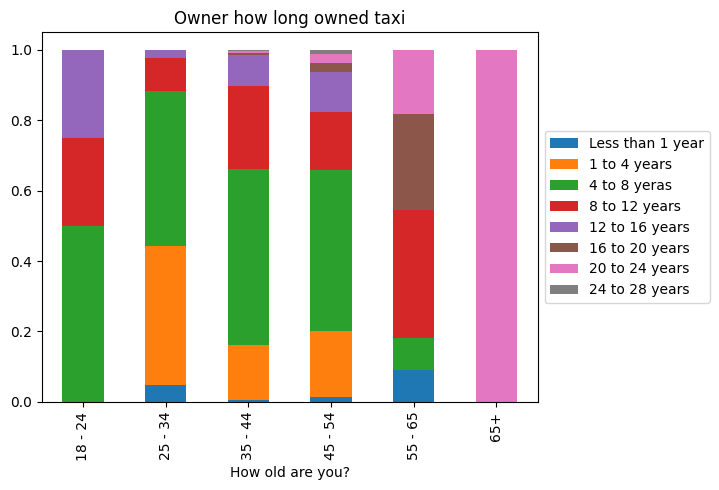

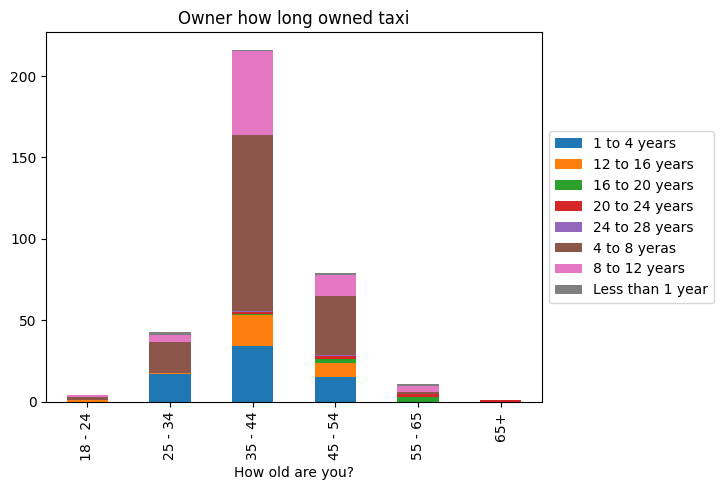

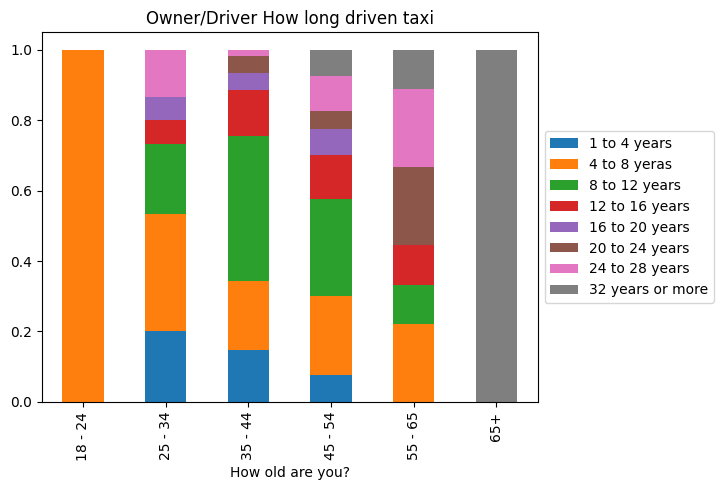

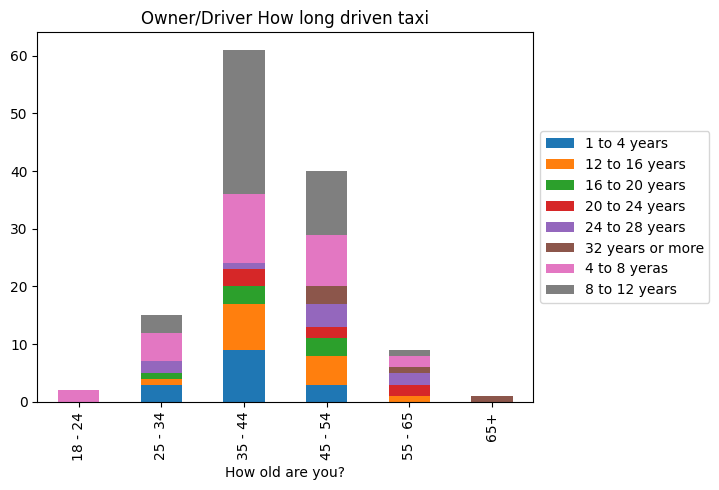

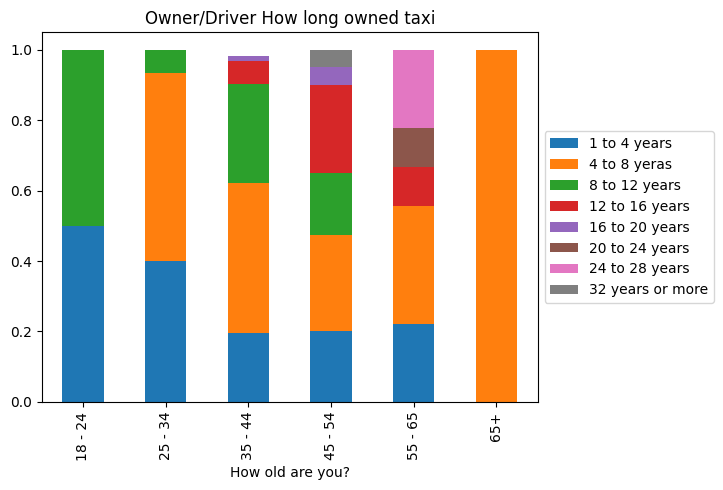

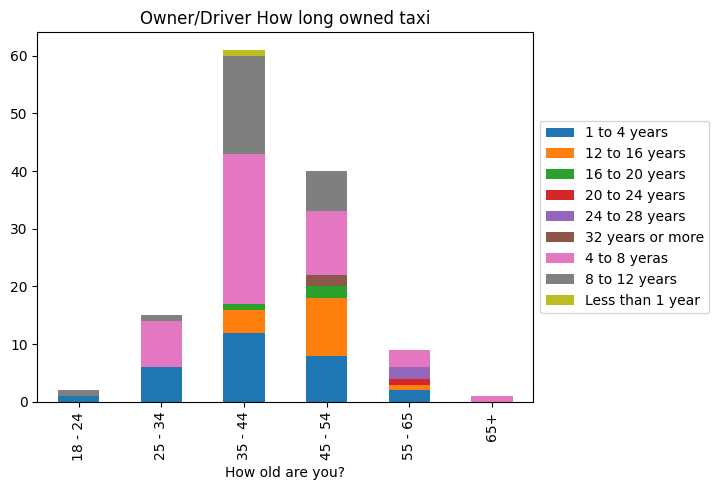

In [133]:
order = ['Less than 1 year', '1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years', '28 to 32 years', '32 years or more']
pd.crosstab(age, driver_how_long_driving, normalize = 'index')[order].plot(kind = 'bar', stacked = True)
plt.title("Driver how long driven taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
pd.crosstab(age, driver_how_long_driving).plot(kind = 'bar', stacked = True)
plt.title("Driver how long driven taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

order = ['Less than 1 year', '1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years']
pd.crosstab(age, owner_how_long_owned_taxi, normalize = 'index')[order].plot(kind = 'bar', stacked = True)
plt.title("Owner how long owned taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
pd.crosstab(age, owner_how_long_owned_taxi).plot(kind = 'bar', stacked = True)
plt.title("Owner how long owned taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

order = ['1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years','32 years or more']
pd.crosstab(age, owner_driver_how_long_driven_taxi, normalize = 'index')[order].plot(kind = 'bar', stacked = True)
plt.title("Owner/Driver How long driven taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
pd.crosstab(age, owner_driver_how_long_driven_taxi).plot(kind = 'bar', stacked = True)
plt.title("Owner/Driver How long driven taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

pd.crosstab(age, owner_driver_how_long_owned_taxi, normalize = 'index')[order].plot(kind = 'bar', stacked = True)
plt.title("Owner/Driver How long owned taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
pd.crosstab(age, owner_driver_how_long_owned_taxi).plot(kind = 'bar', stacked = True)
plt.title("Owner/Driver How long owned taxi")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

Gender

<Axes: >

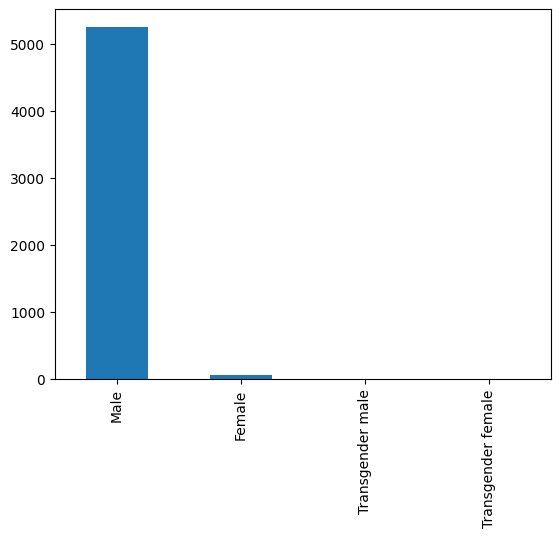

In [138]:
df[demographics[-1]].value_counts().plot(kind = 'bar')
#plotting gender


Creating exploded DF - useful for questions that have multiple answers to select from 

In [116]:
df['benefits_of_etaxi_exploded'] = df[driver_questions[8]].str.split(';')
exploded_df = df.explode('benefits_of_etaxi_exploded', demographics[4])
exploded_df['age'] = exploded_df[demographics[4]]
exploded_df

,In which province or country do you live?,Do you live in a city/urban or rural environment?,In which area are you living in now?,What is your home language,How old are you?,What is your gender?,What is the highest level of schooling have you succesfully completed or passed?,Have you completed ANY tertiary education?,What education have you received after school?,What is the highest level of tertiary education you have succesfully completed?,...,Electric taxis will help lessen the harmful environmental impact caused by the taxi industry,Government should focus on switching to electric vehicles,You describe yourself as someone who often takes risks,You describe yourself as someone who has a lot of trust in other people and institutions in general,You describe yourself as someone who generally trusts new technologies,"This survey is not available in your region yet. If you wish to be contacted when it is, please leave your email address below. Otherwise, you can close this survey.","Thank you for completing the survey. Please share this survey with other minibus taxi owners, drivers, and users: https://bit.ly/etaxisurvey",test,benefits_of_etaxi_exploded,age
0,Western Cape,City / Urban,Nyanga,Xhosa,45 - 54,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,Neutral,Neutral,Agree,Agree,Agree,NaN,NaN,NaN,NaN,45 - 54
1,Western Cape,City / Urban,Mitchell's Plain,Zulu,35 - 44,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,Agree,Agree,Neutral,Neutral,Agree,NaN,NaN,NaN,NaN,35 - 44
2,Western Cape,City / Urban,Cape Town,English,35 - 44,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,Neutral,Neutral,Neutral,Neutral,Neutral,NaN,NaN,NaN,NaN,35 - 44
3,Western Cape,City / Urban,Eerste River,English,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,Agree,Agree,Agree,Neutral,Agree,NaN,NaN,NaN,NaN,35 - 44
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14259,Western Cape,City / Urban,Mfuleni,Xhosa,35 - 44,Male,Grade 10 (Std. 8 / Form 3),No,NaN,NaN,...,Neutral,Strongly disagree,Disagree,Disagree,Disagree,NaN,NaN,"[Don't know, ]",,35 - 44
14260,Western Cape,City / Urban,Belhar,Afrikaans,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,Neutral,Strongly disagree,Agree,Agree,Neutral,NaN,NaN,"[Don't know, ]",Don't know,35 - 44
14261,Western Cape,City / Urban,Belhar,Afrikaans,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,Neutral,Strongly disagree,Agree,Agree,Neutral,NaN,NaN,"[Don't know, ]",,35 - 44
14262,Western Cape,City / Urban,Mfuleni,Xhosa,45 - 54,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,Neutral,Strongly disagree,Agree,Disagree,Disagree,NaN,NaN,"[Don't know, ]",Don't know,45 - 54


Knows what electric taxi is vs. understanding of benefits, risks, and opinion on whether driving an electric taxi would be better than driving a petrol/diesel one

In [99]:
exploded_df['benefits_of_etaxi_exploded'] = exploded_df['benefits_of_etaxi_exploded'][(exploded_df['benefits_of_etaxi_exploded'] != '')].dropna()

In [115]:
# Filter out rows with missing values
data = exploded_df[[driver_questions[7], 'benefits_of_etaxi_exploded']].dropna()
incorrect_answers = ['None of the above', 'More passengers', 'Longer range', 'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'Faster speeds with']
# Define the order of the categories for the stacked plot
correct_answers = list(set(exploded_df['benefits_of_etaxi_exploded']) - set(incorrect_answers))

order = incorrect_answers + correct_answers

# Compute the proportion of each category for each value of the driver question
prop_data = pd.crosstab(data[driver_questions[7]], data['benefits_of_etaxi_exploded'], normalize='index')[order]

# Create the stacked bar plot
prop_data.plot(kind='bar', stacked=True, cmap='coolwarm')

# Add legend and labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Percentage (%)')
plt.xlabel(driver_questions[7])
plt.title('Proportion of benefits of electric taxis by driver response')
plt.show()


# ct= pd.crosstab(exploded_df[driver_questions[7]], exploded_df['benefits_of_etaxi_exploded'], normalize = 'index').reindex(columns = category_order).plot(kind = 'bar', stacked = True, colormap = 'inferno')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.ylabel('Percentage (%)')


KeyError: '[nan] not in index'

#### Logit models

In [226]:
target_df = exploded_df[['test', demographics[4]]]
target_df.dropna(inplace = True)
target_df[demographics[4]].value_counts()
target_df['age_cat']= pd.Categorical(target_df[demographics[4]], ordered = True)
target_df['test'] = pd.Categorical(target_df['test'])
target_df.drop('How old are you?', axis =1 , inplace = True)
target_df
print(target_df.head(5))
tdf = pd.get_dummies(data = target_df, columns = ['test' , 'age_cat'])

                                                 test How old are you?  \
6                           Less expensive to operate          25 - 34   
7                                                              25 - 34   
13  Less exhaust gasses (less emissions and pollut...          35 - 44   
14                                 Lower engine noise          35 - 44   
15                          Less expensive to operate          35 - 44   

    age_cat  
6   25 - 34  
7   25 - 34  
13  35 - 44  
14  35 - 44  
15  35 - 44  


/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_15200/3313974621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.dropna(inplace = True)
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_15200/3313974621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['age_cat']= pd.Categorical(target_df[demographics[4]], ordered = True)


In [113]:
# model = sm.MNLogit(endog=exploded_df['test'], exog=exploded_df['age_cat'], data=exploded_df).fit(method='bfgs')
mod_prob = OrderedModel(np.asarray(tdf['test']),
                        np.asarray(tdf['age_cat']),
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
res_log.summary()

NameError: name 'OrderedModel' is not defined

In [176]:
# df[driver_questions[8]].str.split(';').explode(demographics[4])
# df['test'] = df[driver_questions[8]].str.split(';')
# exploded_df = df.explode('test', demographics[4])
# exploded_df[(exploded_df['test'] != '') & (exploded_df['test'] != None)]
# #pd.crosstab(exploded_df['test'], exploded_df[demographics[4]], normalize = 'index').plot(kind = 'bar', stacked = True)


# # Convert age variable to ordered categorical variable
# exploded_df['age_cat'] = pd.Categorical(exploded_df[demographics[4]], ordered=True, categories=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# # Split data into training and testing sets
# train, test = train_test_split(exploded_df, test_size=0.2, random_state=42)

# # Create instance of OrdinalLogisticRegression class and fit to training data
# model = LogisticIT()
# model.fit(train[['age_cat', 'test' ]], train['test'])

# # Use fitted model to make predictions on test data
# predictions = model.predict(test[['age_cat','test']])

# # Evaluate model performance
# accuracy = model.score(test[['age_cat',demographics[4]]], test[demographics[4]])
# mae = sum(abs(predictions - test[demographics[4]])) / len(predictions)


NameError: name 'OrdinalLogisticRegression' is not defined

In [140]:
# extract unique responses from Column2
unique_responses = taxi_survey.extract_responses(df[driver_questions[8]])
# create a new dataframe with one column for each unique response
response_df = pd.DataFrame(columns=unique_responses)
for index, row in df.iterrows():
    if type(row[driver_questions[8]]) != float: # avoid nans 
        # split the response string into a list of individual responses
        response_list = row[driver_questions[8]].split(';')
        # filter out empty strings
        response_list = list(filter(None, response_list))
        # count the number of times each unique response appears in the list of responses
        response_count = {response: response_list.count(response) for response in unique_responses}
        # add the counts as a new row to the response dataframe
        response_df.loc[index] = response_count
    else:
        # add row of nans if no responses were given
        response_df.loc[index] = [np.nan] * len(unique_responses)
response_df.sum()

Safer                                                                     710.0
Less expensive to operate                                                 596.0
More reliable                                                             491.0
Longer range                                                              440.0
Don't know                                                               1737.0
Faster speeds with                                                        415.0
Less exhaust gasses (less emissions and pollution)                       1011.0
More passengers                                                           406.0
Lower engine noise                                                        787.0
None of the above                                                         679.0
Faster charging an electric taxi than filling up a petrol/diesel taxi     417.0
dtype: float64

In [50]:
#df.groupby([demographics[4], driver_questions[0], driver_questions[8]]).size().unstack()


# extract unique responses from Column2
unique_responses = taxi_survey.extract_responses(df[driver_questions[8]])

# create a new dataframe with one column for each unique response
response_df = pd.DataFrame(columns=unique_responses)

# loop through each row in the original dataframe and count the number of responses for each unique response
for index, row in df.iterrows():
    # split the response string into a list of individual responses
    if type(row[driver_questions[8]]) == str:
        response_list = row[driver_questions[8]].split(';')
        # count the number of times each unique response appears in the list of responses
        response_count = {response: response_list.count(response) for response in unique_responses}
        # add the counts as a new row to the response dataframe
        response_df = response_df.append(response_count, ignore_index=True)
    else: 
        #add row of nans to response_df
        response_df = response_df.append(pd.Series([np.nan]*len(unique_responses)), ignore_index=True)
        
        
# create a cross-tabulation between Column1 and the new response dataframe
cross_tab = pd.crosstab(df[demographics[4]], response_df.columns, values=response_df.values.tolist(), aggfunc='sum')


/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_15200/125991976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append(pd.Series([np.nan]*len(unique_responses)), ignore_index=True)
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_15200/125991976.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append(response_count, ignore_index=True)
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_15200/125991976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_df = response_df.append(pd.Series([np.nan]*len(unique_responses)), ignore_index=True)
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_15200/125991976.py:18: FutureWar

ValueError: Length of values (22) does not match length of index (5703)

# Education

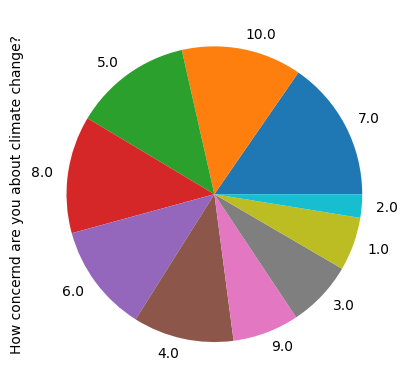

<Axes: ylabel='Electric taxis will help lessen the harmful environmental impact caused by the taxi industry'>

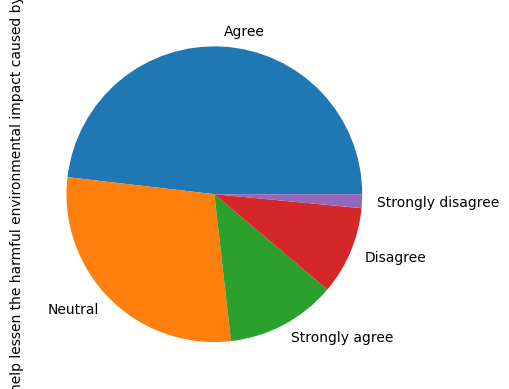

In [ ]:
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]

## Driver/Owner/User

In [20]:
driver_owner_user = df['Please select the option that applies to you:']

## Driver 

In [19]:
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver_e_taxi_better_than_ICE = df[driver_questions[10]]

In [56]:
def extract_responses(column):
    all_responses = []
    for response in column:
        if isinstance(response, str):
            split_responses = response.split(';')
            all_responses.extend([r.strip() for r in split_responses])
    unique_responses = list(set(all_responses))
    return unique_responses
#extract_responses(driver_e_taxi_benefit_vs_ICE)
driver_e_taxi_benefit_vs_ICE.explode().str.strip().value_counts()


Don't know;                                                                                                                                                                                                                   1757
None of the above;                                                                                                                                                                                                             652
Less exhaust gasses (less emissions and pollution);                                                                                                                                                                            281
Safer;                                                                                                                                                                                                                         204
Less expensive to operate;                                                                  

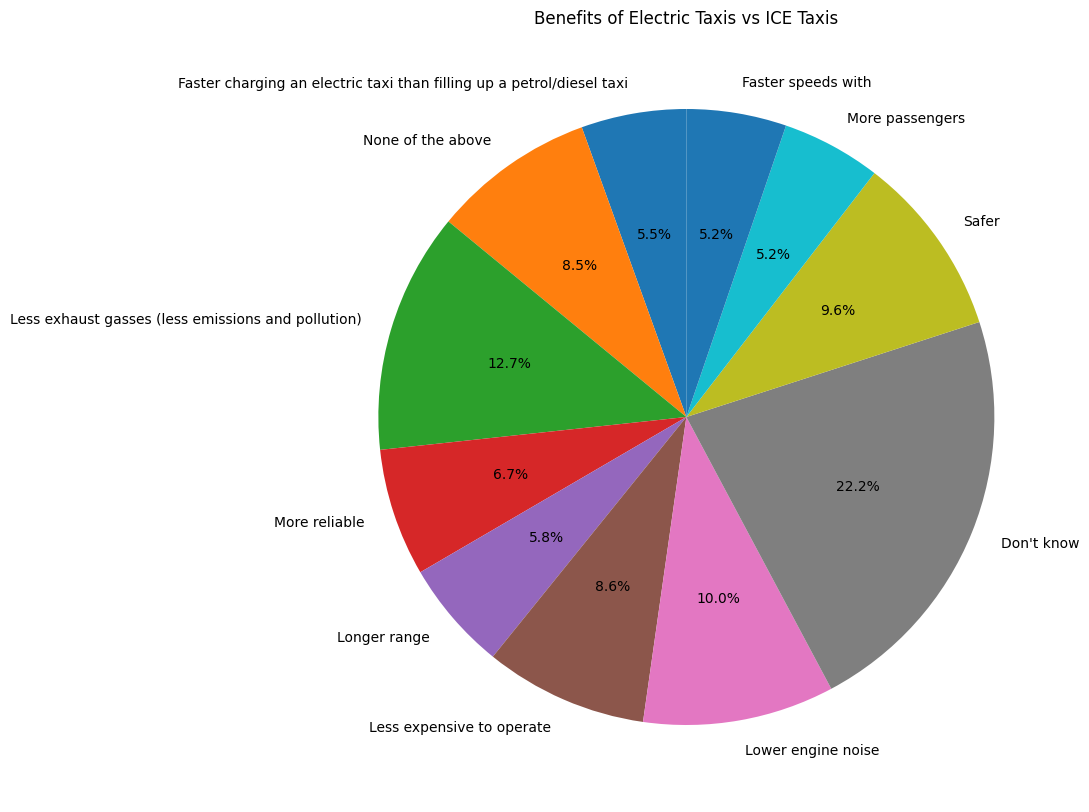

In [85]:

pd.DataFrame.from_dict(extract_responses_value_counts(driver_e_taxi_benefit_vs_ICE), orient = 'index', columns = ['Count']).plot(kind = 'pie', y = 'Count', figsize = (10,10), autopct='%1.1f%%', startangle=90, legend = False, title = 'Benefits of Electric Taxis vs ICE Taxis')
plt.ylabel('')
plt.savefig('figures/drivers_benefits_of_electric_taxis_vs_ICE_taxis_distribution.png')
plt.show()


## Owner

In [7]:
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]

# Owner + Driver

In [8]:
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]

## User

In [25]:
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
owner_driver_e_taxi_benefit = user_questions[7]
owner_driver_e_taxi_risks = user_questions[8]
owner_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]

# Perceptions of Petrol and Diesel Taxis

In [41]:
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]

# Perception of EV

In [35]:
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]

In [46]:
EV_taxi_range.value_counts()
EV_taxi_charge_time.value_counts()

2 - 5hours             1814
More than 5hours       1455
1 - 2hours              909
30minutes - 1hour       566
20 - 30minutes          300
10 - 20minutes          128
Less than 10minutes      40
Name: How long do you think an electric taxi will take to fully recharge from an empty battery?, dtype: int64

# Other - need for ev taxi, climate change, and personal characteristics

In [37]:
need_for_e_taxi = df.columns[81:84]
possible_to_buy_ev = df[need_for_e_taxi[0]]
no_longer_possible_to_buy_ICE = df[need_for_e_taxi[1]]

### Climate

In [40]:
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]

Age/Income/DOU vs. climate concern

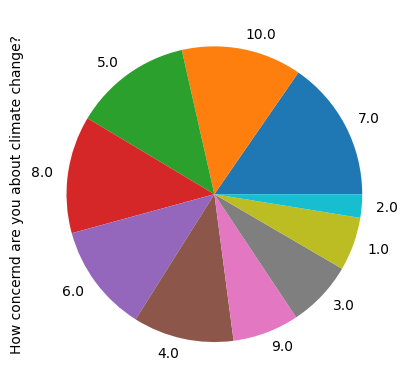

<Axes: ylabel='Electric taxis will help lessen the harmful environmental impact caused by the taxi industry'>

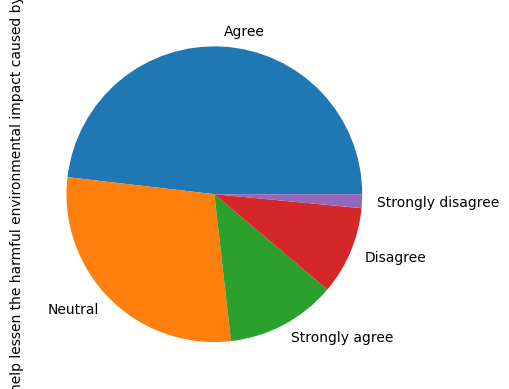

In [112]:
climate_concern.value_counts().plot(kind='pie')
plt.show()
climate_EV_taxis_help_environment.value_counts().plot(kind='pie')

In [39]:
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

## Analysis tools

pd.crosstab()

value_counts

groupby([]).size.unstack

groupby value counts

## <font color = 'orange'> Crosstabs <font>

In [ ]:
'''
Input columns to crosstab, return crosstab df (and plot?)
'''

# Look at relationship of region on target variables
demographics_crosstabs = get_crosstabs(df, demographics, targets)
# ctab = pd.crosstab(df[demographics[0]], df[targets[0]])
# ctab[ctab.columns[(ctab>25).any()]].to_csv('region_benefits.csv')
educational_crosstabs = get_crosstabs(df, education, targets)
# pd.crosstab(df[demographics[0]], df[targets[1]]).to_csv('region_risks.csv')

# pd.crosstab(df[demographics[0]], df[targets[2]]).to_csv('region_decision.csv')

# # Look at effect of city/urban rural on target variables
# demographics[1]

# # Look at effect of home language on target variables
# demographics[2]


# # Look at effect of age on target variables
# demographics[3]

# # Look at effect of area of living in
# demographics[4]

# # Look at effect of home language 
# demographics[5]

# # Look at effect of age 


# # Effect of sex on target variables
# demographics[6]



In [ ]:
df['What is the highest level of schooling have you succesfully completed or passed?'].value_counts()

Plot stacked bar function

In [ ]:
def plot_stacked_bar_crosstab(df, feature, target):
    pd.crosstab(df[feature], df[target], normalize = 'index').plot(kind = 'bar', stacked = True)
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.title(f'"{target}" by gender')
    plt.show()
plot_stacked_bar_crosstab(df, demographics[5], targets[2])

Spilt by educational attainment

In [ ]:
df

In [ ]:
df.groupby(education[0]).sum(df[target]).plot

In [ ]:
pd.crosstab(df[education[0]], df[targets[2]])
from matplotlib.category import UnitData
# get crosstab with percents
#round(pd.crosstab(df[education[0]], df[targets[2]], normalize='index'),2).to_csv('education_decision.csv')
#print(round(100 * pd.crosstab(df[education[0]], df[targets[2]], normalize='index'),2).to_latex())
ctab = round(100 * pd.crosstab(df[education[0]], df[targets[2]], normalize='index'),2)
#ctab = round(pd.crosstab(df[education[0]], df[targets[2]]),2)
ctab = ctab[answers]
print(ctab)
grade_labels = ['No Schooling', 
                'Grade 2 (previously Sub A / class 2)', 
                'Grade 3 (Std. 1)',
                'Grade 4 (Std. 2)', 
                'Grade 5 (Std. 3)',
                'Grade 6 (Std. 4)',
                'Grade 7 (Std. 5)',
                'Grade 8 (Std. 6 / Form 1)',
                'Grade 9 (Std. 7 / Form 2)',
                'Grade 10 (Std. 8 / Form 3)',
                'Grade 11 (Std. 9 / Form 4)',
                'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)']
category_order = [cat for cat in grade_labels if cat in ctab.index]

df['Please select the option that applies to you:']

ctab = pd.crosstab( df['On WEEKDAYS, how many hours do you drive a taxi per day?'], df[targets[2]], normalize = 'index')[answers].plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ctab.loc[category_order].plot(kind='bar', stacked=True)
plt.show()


#category_order = grade_labels[:len(ctab.index)]
category_order = [cat for cat in grade_labels if cat in ctab.index]
ctab.loc[category_order].plot(kind='bar', stacked=True)
plt.xticks(range(len(category_order)), category_order)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Percent each response (%)')
plt.title("Driving an electric taxi would be better than driving a petrol/diesel taxi vs educational attainment (normalized)")
plt.savefig('figures/education_decision_percent.png', bbox_inches='tight')
plt.show()

ctab = round(pd.crosstab(df[education[0]], df[targets[2]]),2)
ctab = ctab[answers]
print(ctab)
ctab.loc[category_order].plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Count each response (#)')
plt.title("Driving an electric taxi would be better than driving a petrol/diesel taxi vs educational attainment (absolute count)")
plt.savefig('figures/education_decision_count.png', bbox_inches='tight')
plt.show()


In [ ]:
df['Do you know what an electric taxi is'].value_counts()

In [ ]:
#take out all responses with semicolon
target = df[df['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)'].str.contains(';') == False]
target

In [ ]:
d_o_u = df['Please select the option that applies to you:']
d_o_u = df['Please select the option that applies to you:'] 
do_you_know = df['Do you know what an electric taxi is']

In [ ]:
pd.crosstab(d_o_u, do_you_know, normalize = 'index')


In [ ]:
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

Income

In [ ]:
income = df[df['What is your approximate average income per\xa0day? (in South African Rand)'] < 5000]
plt.hist(income['What is your approximate average income per\xa0day? (in South African Rand)'], bins = 20)
#speeds.plot(='density', title='Density of Instantaneous Speeds')

## <font color = 'orange'> Logistic Regression / Odds Ratios</font>

Effect of age on how would an electric vehicle benefit you

In [17]:
exploded_df['test'].value_counts()


                                                                         4730
Don't know                                                               1900
Less exhaust gasses (less emissions and pollution)                       1083
Lower engine noise                                                        860
Safer                                                                     818
Less expensive to operate                                                 733
None of the above                                                         731
More reliable                                                             574
Longer range                                                              495
Faster charging an electric taxi than filling up a petrol/diesel taxi     472
Faster speeds with                                                        449
More passengers                                                           446
Name: test, dtype: int64

In [22]:

category_map = {
    "Don't know": 10,
    'Less exhaust gases (less emissions and pollution)': 9,
    'Lower engine noise': 8,
    'Less expensive to operate': 7,
    'Safer': 6,
    'More passengers': 5,
    'Faster speeds with': 4,
    'Faster charging an electric taxi than filling up a petrol/diesel taxi': 3,
    'Longer range': 2,
    'More reliable': 1,
    'None of the above': 0
}

# Extract features and outcomes 
logit_df = exploded_df[demographics[4]]
logit_df = pd.get_dummies(logit_df)
logit_df = logit_df.join(exploded_df['test'].map(category_map))
logit_df.dropna(inplace = True)

# Define features and target variables
X = logit_df.drop('test', axis = 1)
y = logit_df['test']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict on X test set
y_pred = logreg.predict(X_test)

# Evaluate performance of model on y test set 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Get the odds ratios
odds_ratios = np.exp(logreg.coef_)
categories = {
    "Don't know",
    'Less exhaust gases (less emissions and pollution)',
    'Lower engine noise',
    'Less expensive to operate',
    'Safer',
    'More passengers',
    'Faster speeds with',
    'Faster charging an electric taxi than filling up a petrol/diesel taxi',
    'Longer range',
    'More reliable',
    'None of the above'
}

# Print the odds ratios
print("Odds Ratios:")
odds_df = pd.DataFrame(index = [f'{feature} - {outcome}' for feature in X.columns for outcome in categories], columns = ['Odds Ratio'])
for i, feature in enumerate(X.columns):
    for j, outcome in enumerate(categories):
        odds_df.loc[f'{feature} - {outcome}'] = f'{odds_ratios[j][i]:.3f}'
        print(f"{feature} - {outcome}: {odds_ratios[j][i]:.3f}")


Accuracy: 0.25
Precision: 0.08439171122994653
Recall: 0.25
Odds Ratios:
18 - 24 - Lower engine noise: 0.403
18 - 24 - Less exhaust gases (less emissions and pollution): 0.958
18 - 24 - Don't know: 0.998
18 - 24 - Less expensive to operate: 1.305
18 - 24 - More reliable: 1.176
18 - 24 - None of the above: 1.035
18 - 24 - More passengers: 1.171
18 - 24 - Faster charging an electric taxi than filling up a petrol/diesel taxi: 1.350
18 - 24 - Longer range: 1.301
18 - 24 - Faster speeds with: 0.794


/Users/Orie4416/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: index 10 is out of bounds for axis 0 with size 10

Effect of education on would an electric vehicle be better

In [260]:
targets = driver_questions[8:11]

#demographics = demographics.drop('In which area are you living in now?')
category_map = {
    'Don\'t know': 5,
    'Strongly agree': 4,
    'Agree': 3,
    'Neutral': 2,
    'Disagree': 1,
    'Strongly Disagree': 0
}

# Extract features and outcomes 
logit_df = df[education[0]]
logit_df = pd.get_dummies(logit_df)
logit_df = logit_df.join(df[targets[2]].map(category_map))
logit_df.dropna(inplace = True)

# Define features and target variables
X = logit_df.drop(targets[2], axis = 1)
y = logit_df[targets[2]]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict on X test set
y_pred = logreg.predict(X_test)

# Evaluate performance of model on y test set 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.30762639245929735
Precision: 0.18493908063195544
Recall: 0.30762639245929735


/Users/Orie4416/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
logreg.coef_

array([[-0.00486485,  0.5466916 , -0.34800964,  0.13024266, -0.31150076,
        -0.57542377, -1.07545801, -0.8263273 , -0.8018491 , -0.51016459,
         0.16727246,  0.08065307, -0.54654428],
       [-0.34672179, -0.22377302, -0.14717618, -0.50886993, -0.49806474,
         0.67713414,  0.05403732,  0.54571737,  0.39224728,  0.28340228,
        -0.00686689,  0.08710808, -0.03214573],
       [-0.33726011, -0.65865807, -0.42469122, -0.33838601,  1.24100033,
         0.85482096,  1.20453412,  0.77438803,  0.40710411,  0.04663833,
        -0.49851062, -0.46340499,  0.35580071],
       [-0.13791734,  0.07585868,  0.33445292,  0.16822732, -0.38667442,
         1.10530661,  0.94494983,  1.12370542,  0.08373021, -0.02695616,
         0.2411424 , -0.17185526,  0.04426696],
       [-0.40403021,  0.07055691,  0.163739  , -0.06689071, -0.20664965,
        -0.77550789, -0.45468973, -1.35783181, -0.19908259, -0.36079604,
        -0.23513314,  0.03109114, -0.1924661 ],
       [ 1.23079431,  0.189323

In [263]:
# Get the odds ratios
odds_ratios = np.exp(logreg.coef_)
categories = ['Don\'t know', 'Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']

# Print the odds ratios
print("Odds Ratios:")
odds_df = pd.DataFrame(index = [f'{feature} - {outcome}' for feature in X.columns for outcome in categories], columns = ['Odds Ratio'])
for i, feature in enumerate(X.columns):
    for j, outcome in enumerate(categories):
        odds_df.loc[f'{feature} - {outcome}'] = f'{odds_ratios[j][i]:.3f}'
        print(f"{feature} - {outcome}: {odds_ratios[j][i]:.3f}")


Odds Ratios:
Don't know - Don't know: 0.995
Don't know - Strongly agree: 0.707
Don't know - Agree: 0.714
Don't know - Neutral: 0.871
Don't know - Disagree: 0.668
Don't know - Strongly Disagree: 3.424
Grade 10 (Std. 8 / Form 3) - Don't know: 1.728
Grade 10 (Std. 8 / Form 3) - Strongly agree: 0.799
Grade 10 (Std. 8 / Form 3) - Agree: 0.518
Grade 10 (Std. 8 / Form 3) - Neutral: 1.079
Grade 10 (Std. 8 / Form 3) - Disagree: 1.073
Grade 10 (Std. 8 / Form 3) - Strongly Disagree: 1.208
Grade 11 (Std. 9 / Form 4) - Don't know: 0.706
Grade 11 (Std. 9 / Form 4) - Strongly agree: 0.863
Grade 11 (Std. 9 / Form 4) - Agree: 0.654
Grade 11 (Std. 9 / Form 4) - Neutral: 1.397
Grade 11 (Std. 9 / Form 4) - Disagree: 1.178
Grade 11 (Std. 9 / Form 4) - Strongly Disagree: 1.525
Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5) - Don't know: 1.139
Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5) - Strongly agree: 0.601
Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5) - Agree: 0.713
G

In [ ]:
print(odds_df.to_latex())

Correlation analysis

In [ ]:
import scipy.stats as stats

# Extract features and outcomes 
corr_df = df[demographics]
corr_df = pd.get_dummies(corr_df)
corr_df = corr_df.join(df[targets[2]].map(category_map))
corr_df.dropna(inplace = True)

# Calculate correlation coefficients
correlations = []
for feature in X.columns:
    corr, _ = stats.pearsonr(corr_df[feature], corr_df[targets[2]])
    correlations.append((feature, corr))

# Print and save results
correlations.sort(key=lambda x: abs(x[1]), reverse=True)
for feature, corr in correlations:
    print(f"{feature}:\t{corr:.3f}")


In [ ]:
outcome_categories = df[targets[2]].unique()

for outcome in outcome_categories:
    print(f"Correlations for Outcome: {outcome}")
    print("-" * 50)
    outcome_df = df[df[targets[2]] == outcome]
    for feature in demographics:
        corr = outcome_df[feature].corr(outcome_df[targets[2]])
        print(f"{feature}: {corr:.3f}")
    print("\n")


To LaTeX

In [ ]:
import tabulate

# Convert the odds ratios to a list of lists
odds_ratios_list = [[f"{odds:.3f}" for odds in feature_odds] for feature_odds in odds_ratios]

# Get the list of outcome categories
outcome_categories = list(category_map.keys())

# Add a header row with the outcome categories
table_data = [outcome_categories] + odds_ratios_list

# Add the feature names as the first column
feature_names = X.columns.tolist()
table_data = [[name] + row for name, row in zip(feature_names, table_data)]

# Use tabulate to format the table
table_str = tabulate.tabulate(table_data, headers="firstrow", tablefmt="latex_booktabs")

# Print the LaTeX code for the table
print(table_str)


In [ ]:
logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
coef_table = pd.DataFrame({'feature': X.columns, 'coef': logreg.coef_[0]})
coef_table


# <font color = 'orange'> Prototype analysis </font>

## Dython
This doesn't tell me anything

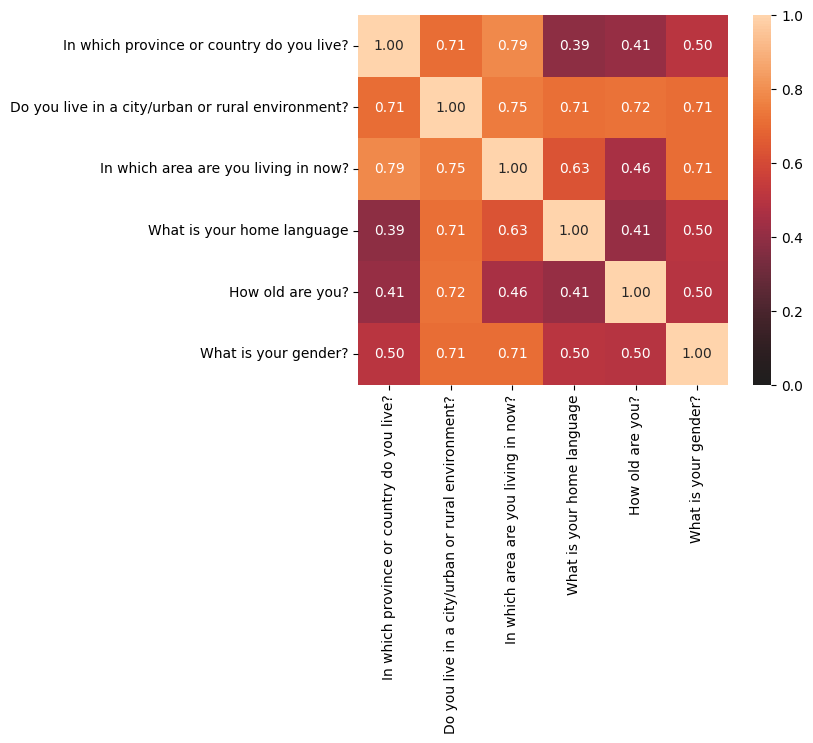

{'corr':                                                    In which province or country do you live?  \
 In which province or country do you live?                                           1.000000   
 Do you live in a city/urban or rural environment?                                   0.707407   
 In which area are you living in now?                                                0.786278   
 What is your home language                                                          0.385829   
 How old are you?                                                                    0.409197   
 What is your gender?                                                                0.503162   
 
                                                    Do you live in a city/urban or rural environment?  \
 In which province or country do you live?                                                   0.707407   
 Do you live in a city/urban or rural environment?                                           1.000000

In [23]:
from dython.nominal import identify_nominal_columns
categorical_features = identify_nominal_columns(df[demographics])
associations(df[demographics])
#This doesn't work because the categories aren't ordered so the final values are meaningless - even if they were it would be difficult to interpret

## <font color = 'orange'> Powerful double crosstab tekneek!! <font>

In [24]:
df.groupby([targets[2], education[0]]).agg('sum').unstack(targets[2])['How many days of the week do you drive a taxi']

NameError: name 'targets' is not defined

## Example of One Hot Encoding

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Please select the option that applies to you:']]).toarray())
encoder_df.columns = encoder.get_feature_names_out()
#merge one-hot encoded columns back with original DataFrame
#final_df = df.join(encoder_df)

#view final df
print(encoder_df.sum(axis = 0))


## <font color = 'orange'> Factor analysis <font>

Adequacy test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
# chi_sq_val, p_val = calculate_bartlett_sphericity(df[demographics])
# chi_sq_val, p_val
kmo_all, kmo_model = calculate_kmo(df[targets])


What factors do I hypothesize exist in the data?...

Political leanings

Quality of life

Income

In [ ]:
# Create a new dataframe with just the survey questions
X = df.iloc[0:15]

# Create a factor analysis object with 3 factors
fa = FactorAnalyzer(n_factors=3, rotation='varimax')

# Fit the factor analysis to the survey data
fa.fit(X)

# Print the factor loadings
print(fa.loadings_)